In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

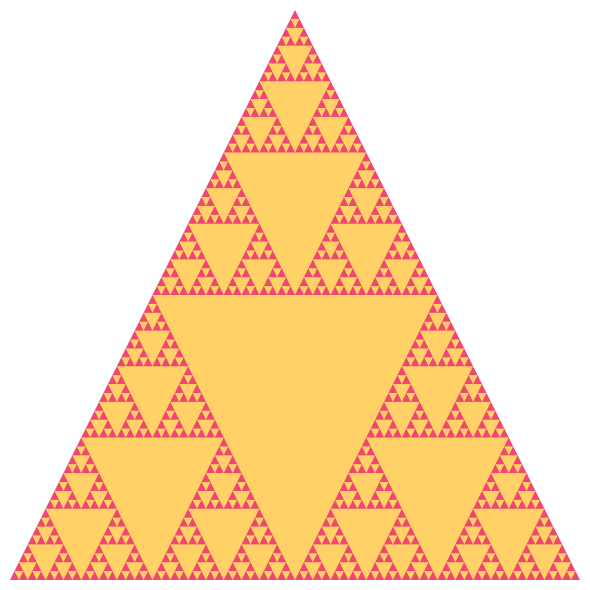

In [35]:
def gen_bound_squares_plus(depth):
    squares = []
    if depth == 0:
        return squares
    squares.append([np.array([[0, 0], [1, 1]])])
    for d in range(1, depth):
        squares_new = []
        for square in squares[d - 1]:
            squares_new += squares_in_square_plus(square)
        squares.append(squares_new)
    return [square for squares_d in squares for square in squares_d]


def squares_in_square_plus(square):
    w = square[1, 0] - square[0, 0]
    h = square[1, 1] - square[0, 1]
    assert w == h
    # top square
    top = np.array(
        [
            [square[0, 0] + w / 4, square[0, 1] + w / 2],
            [square[1, 0] - w / 4, square[1, 1]],
        ]
    )
    left = np.array(
        [
            square[0],
            [square[1, 0] - w / 2, square[1, 1] - w / 2],
        ]
    )
    right = np.array(
        [
            [square[0, 0] + w / 2, square[0, 1]],
            [square[1, 0], square[1, 1] - w / 2],
        ]
    )
    return top, right, left


def negate_square(square):
    w = square[1, 0] - square[0, 0]
    return np.array(
        [
            [square[0, 0] + w / 4, square[0, 1]],
            [square[1, 0] - w / 4, square[1, 1] - w / 2],
        ]
    )


def square_to_flipped_equil_triangle(square):
    w = square[1, 0] - square[0, 0]
    return np.array(
        [
            [square[0][0], square[1][1]],
            square[1],
            [square[0][0] + w / 2, square[0][1]],
        ]
    )


def gen_triangles(depth):
    bound_squares_plus = gen_bound_squares_plus(depth)
    triangles = []
    for square in bound_squares_plus:
        triangles.append(square_to_flipped_equil_triangle(negate_square(square)))
    return triangles


def plot_triangles(triangles):
    fig, ax = plt.subplots(figsize=(6, 6))
    tri = plt.Polygon([[0, 0], [0.5, 1], [1, 0]], edgecolor="none", facecolor="#ef476f")
    ax.add_patch(tri)
    for triangle in triangles:
        tri = plt.Polygon(triangle, edgecolor="none", facecolor="#ffd166")
        ax.add_patch(tri)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect("equal")
    ax.axis("off")
    plt.tight_layout()


triangles = gen_triangles(6)
plot_triangles(triangles)